In [261]:
import sys
sys.path.insert(0,'python')
from fast_rw import *
import numpy.ma as ma
#data = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
#mask = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')
#grid_z0 = ma.array(data, mask=mask)
#b4 = parallel_rw_pkl(None, 'b4', 'r')

### read in some data to test the discrete cosine transform

In [99]:
import sys
sys.path.insert(0,'python')
from smoothn import *
a = modis_cut
b = gaus
dct_conv = dctND(dctND(a)*dctND(b), f=idct)

<matplotlib.colorbar.Colorbar instance at 0x7f6238663290>

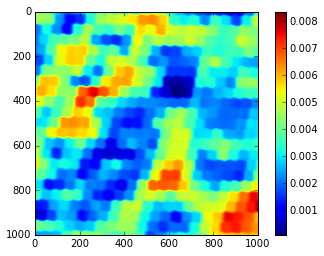

In [100]:
plt.imshow(dct_conv)
plt.colorbar()

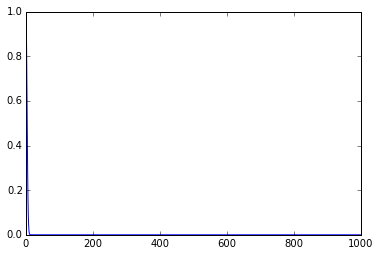

In [208]:
N = 1000
sigma = 100
gaus1 = []
for k in range(N):
    gaus1.append(np.exp(-1*0.5*(k*np.pi*sigma/(N*1.))**2))
plt.plot(gaus1)

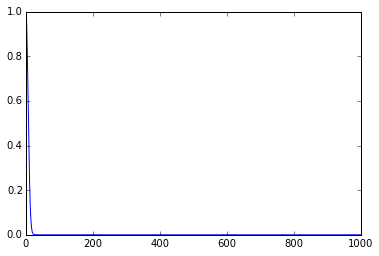

In [209]:
N = 1000
sigma = 50
gaus2 = []
for k in range(int(N)):
    gaus2.append(np.exp(-1*0.5*(k*np.pi*sigma/(N*1.))**2))
plt.plot(gaus2[:1000])

<matplotlib.colorbar.Colorbar instance at 0x7f618e061b00>

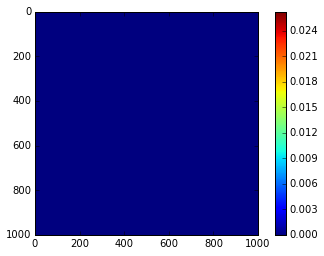

In [211]:
gaus = np.outer(gaus1,gaus2)
gaus = gaus/(gaus.sum())
plt.imshow(gaus)
plt.colorbar()

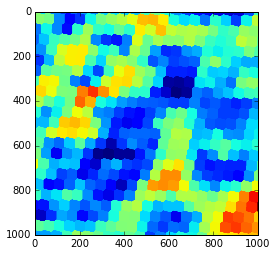

In [202]:
a = modis_cut
plt.imshow(a)

<matplotlib.colorbar.Colorbar instance at 0x7f618df316c8>

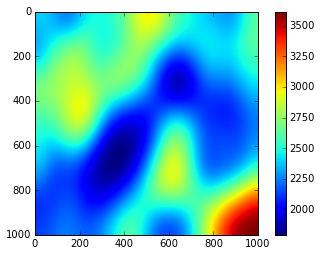

In [212]:
from scipy.fftpack.realtransforms import dct,idct
dct_conv = idct(idct(dct(dct(a, norm='ortho', axis=-1), norm='ortho',axis=0)*gaus, axis = 0,norm='ortho'), axis = -1,norm = 'ortho')
plt.imshow(dct_conv*a.shape[0]*a.shape[1])
plt.colorbar()

In [43]:
b = np.outer(signal.gaussian(1000, 100),signal.gaussian(1000, 50))
f_conv = signal.fftconvolve(a,b, 'same')

<matplotlib.colorbar.Colorbar instance at 0x7f623b1c26c8>

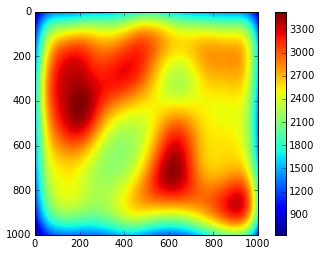

In [44]:
plt.imshow(f_conv)
plt.colorbar()

In [8]:
i = 1;j=1
s1 = slice((i*1000),(i+1)*1000)
s2 = slice((j*1000),(j+1)*1000)
modis_cut = grid_z0[s1,s2]*0.001
sent_cut = b4[s1,s2]

In [271]:
uls = np.unique(modis_cut)
uls[0]

0.048740222912058526

In [273]:
%matplotlib inline
import pylab as plt
mask = (modis_cut==uls[0])
modis_cut[~mask] = 0

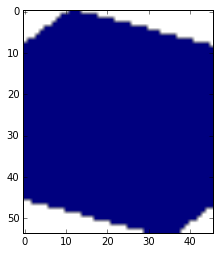

In [244]:
import numpy.ma as ma
xmin = np.where(mask)[0].min()
xmax = np.where(mask)[0].max()
ymin = np.where(mask)[1].min()
ymax = np.where(mask)[1].max()
smask = mask[xmin:xmax,ymin:ymax].copy()
plt.imshow(ma.array(smask, mask=~smask), cmap = plt.get_cmap('jet'))

In [9]:
from scipy import signal
gaus = np.outer(signal.gaussian(2000, 100),signal.gaussian(2000, 50))
#h = gaus[len(gaus)/2:]
#H = scipy.fftpack.dct(h,type =1)
#plt.plot(H)
#H = np.diag(H)
gaus.shape
gaus = gaus[1000:,1000:]

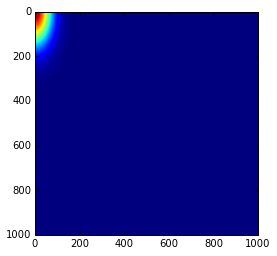

In [268]:
plt.imshow(gaus/gaus.sum())

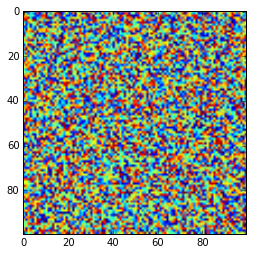

In [406]:
a = np.random.random((100,100))
plt.imshow(a)

<matplotlib.colorbar.Colorbar instance at 0x7f9dab18a368>

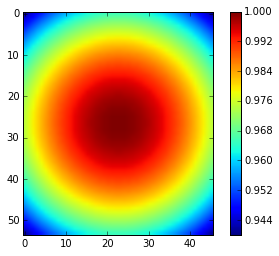

In [245]:
from scipy import signal
xwin = np.where(mask)[0].max() - np.where(mask)[0].min()
ywin = np.where(mask)[1].max() - np.where(mask)[1].min()
a = np.outer(signal.gaussian(xwin, 100), signal.gaussian(ywin, 100))
plt.imshow(a,vmin=0.94,cmap = plt.get_cmap('jet'))
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f9dab04aab8>

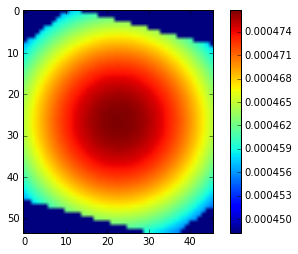

In [246]:
a[~smask] = 0
normgaus = a/(a.sum())
plt.imshow(normgaus,vmin=0.94/(a.sum()))
plt.colorbar()

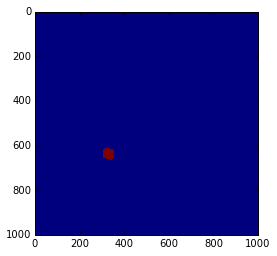

In [247]:
plt.imshow(mask)

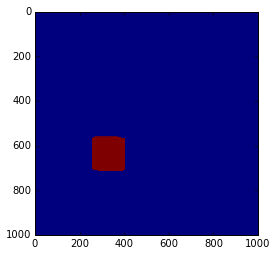

In [255]:
from scipy import ndimage 
from scipy.ndimage.morphology import binary_dilation as bd
struct = ndimage.generate_binary_structure(2, 2)
dia_m = bd(mask, structure=struct, iterations=50)
plt.imshow(dia_m)

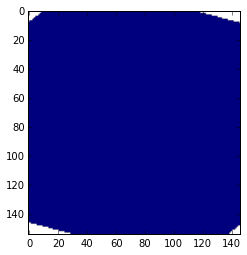

In [256]:
dxmin = np.where(dia_m)[0].min()
dxmax = np.where(dia_m)[0].max()
dymin = np.where(dia_m)[1].min()
dymax = np.where(dia_m)[1].max()
dia_m = dia_m[dxmin:dxmax,dymin:dymax]
plt.imshow(ma.array(dia_m, mask=~dia_m))

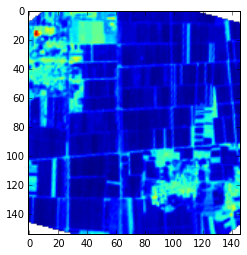

In [257]:
to_conv = sent_cut[dxmin:dxmax,dymin:dymax]
plt.imshow(ma.array(to_conv, mask=~dia_m))

In [258]:
uls[0]

0.048740222912058526

(100, 0)

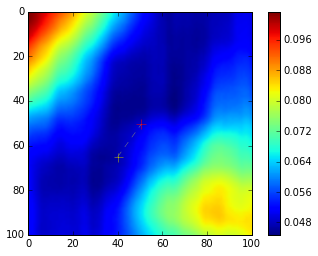

In [301]:
conved = signal.fftconvolve(to_conv,normgaus, mode='valid')
dif = abs(conved-uls[0])
plt.imshow(dif)
minm = np.where(dif ==dif.min())
cenx = dif.shape[0]/2.
ceny = dif.shape[1]/2.
plt.plot(cenx, ceny, 'r+', markersize=10)
plt.plot(minm[0], minm[1], 'y+', markersize=9)
plt.plot([minm[0],dif.shape[1]/2.], [minm[1], dif.shape[0]/2.], '--', color='gray', linewidth = 0.5)
plt.colorbar()
plt.xlim(0,100)
plt.ylim(100,0)

In [305]:
xshif = cenx - minm[0]
yshif = ceny - minm[1]
print xshif,yshif

[ 10.5] [-14.5]


### Gaussian

In [12]:
from scipy import signal
import numpy as np
import scipy
from scipy import signal
import pylab as plt
%matplotlib inline
def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus/(xgaus.sum()), ygaus/(ygaus.sum()))
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2.: center[0]+xwin/2., center[1]-ywin/2.:center[1]+ywin/2.]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


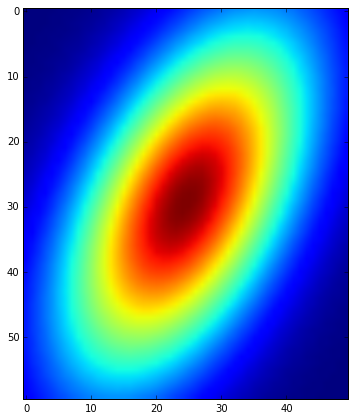

In [21]:
xwin = 60; ywin=50; xstd =20; ystd = 10; angle=-27
plt.figure(figsize=(7,7))
plt.imshow(gaussian(xwin, ywin, xstd, ystd, angle, norm = True))

In [ ]:
# y :0-56; x: 0-31

Patch 2

In [35]:
import cPickle as pkl
patch2=[]
for i in range(16):
    patch2.append(pkl.load(open('pkls/22_06_test2%i.pkl'%i, 'r')))

In [36]:
xstd = []
ystd = []
xsft = []
ysft = []
angle = []
u = []
conved = []
indx = []
indy = []
for i in patch2:
    for j in i:
        for k in j:
            for l in k:
                xstd.append(l[0])
                ystd.append(l[1])
                angle.append(l[2])
                xsft.append(l[3])
                ysft.append(l[4])
                u.append(l[5])
                conved.append(l[6])
                indx.append(l[7])
                indy.append(l[8])

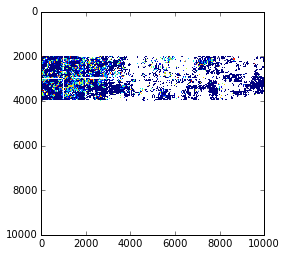

In [37]:
import numpy as np
data = np.zeros((10000,10000))
data[:] = np.nan
for i,j in enumerate(xstd):
    data[indx[i], indy[i]] = j
%matplotlib inline
import pylab as plt
plt.imshow(data)

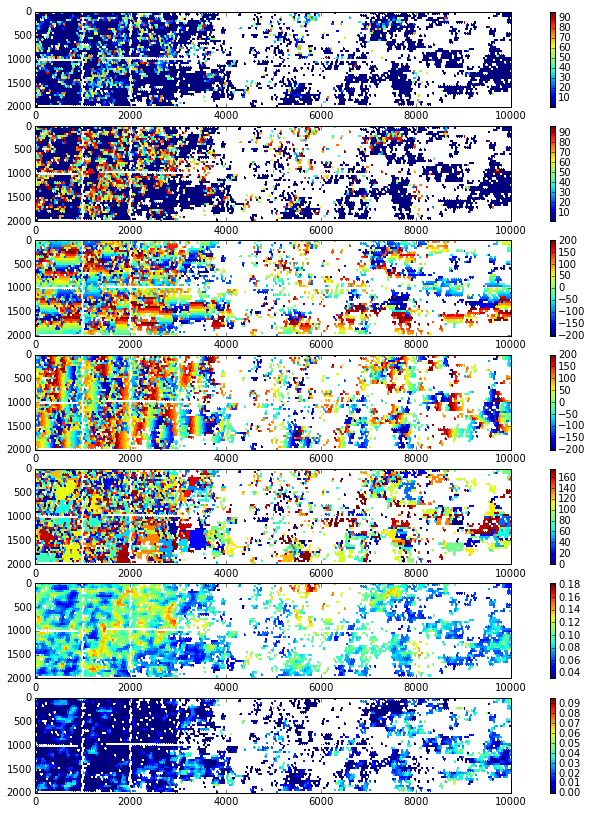

In [38]:
fig = plt.figure(figsize = (14,14))
for k,l in enumerate([xstd, ystd, xsft, ysft, angle,u, conved]):
    data = np.zeros((10000,10000))
    data[:] = np.nan
    for i,j in enumerate(l):
        data[indx[i], indy[i]] = j
    pind = int('71%s'%(k+1))
    ax = fig.add_subplot(pind)
    im = ax.imshow(data[2000:4001,:])
    fig.colorbar(im)

In [39]:
print 'means:',np.mean(xstd),np.mean(ystd),np.mean(angle),np.mean(xsft),np.mean(ysft),np.mean(u),np.mean(conved)
print 'stds:',np.std(xstd),np.std(ystd),np.std(angle),np.std(xsft),np.std(ysft),np.std(u),np.std(conved)

means: 11.1926823988 24.1803420654 90.0909287725 3.97726780688 6.18510500108 0.0876214493131 0.00971673303881
stds: 19.823744418 33.1821740327 53.2238688402 114.314944806 112.315581913 0.0235753344857 0.012697594137


patch 3

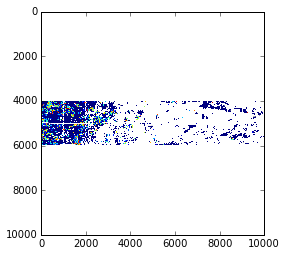

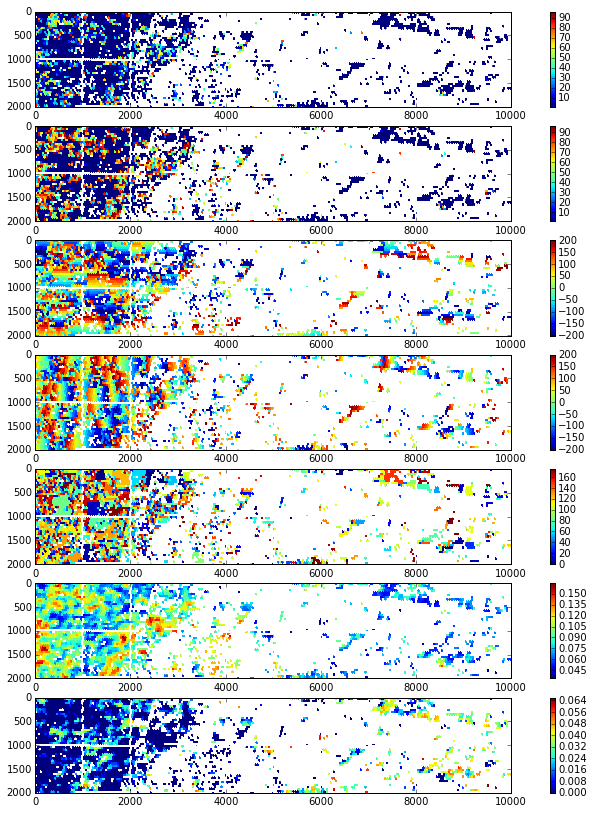

In [41]:
import cPickle as pkl
patch=[]
for i in range(16):
    patch.append(pkl.load(open('pkls/22_06_test3%i.pkl'%i, 'r')))
xstd = []
ystd = []
xsft = []
ysft = []
angle = []
u = []
conved = []
indx = []
indy = []
for i in patch:
    for j in i:
        for k in j:
            for l in k:
                xstd.append(l[0])
                ystd.append(l[1])
                angle.append(l[2])
                xsft.append(l[3])
                ysft.append(l[4])
                u.append(l[5])
                conved.append(l[6])
                indx.append(l[7])
                indy.append(l[8])
                
data = np.zeros((10000,10000))
data[:] = np.nan
for i,j in enumerate(xstd):
    data[indx[i], indy[i]] = j

import pylab as plt
plt.imshow(data) 

fig = plt.figure(figsize = (14,14))
for k,l in enumerate([xstd, ystd, xsft, ysft, angle,u, conved]):
    data = np.zeros((10000,10000))
    data[:] = np.nan
    for i,j in enumerate(l):
        data[indx[i], indy[i]] = j
    pind = int('71%s'%(k+1))
    ax = fig.add_subplot(pind)
    im = ax.imshow(data[4000:6001,:])
    fig.colorbar(im)

In [42]:
print 'means:',np.mean(xstd),np.mean(ystd),np.mean(angle),np.mean(xsft),np.mean(ysft),np.mean(u),np.mean(conved)
print 'stds:',np.std(xstd),np.std(ystd),np.std(angle),np.std(xsft),np.std(ysft),np.std(u),np.std(conved)

means: 11.2363013699 23.8270547945 89.6386986301 -16.1825342466 2.82020547945 0.0895605247591 0.0113953588619
stds: 20.197118946 33.2249888559 52.2133197823 118.385121053 114.648400284 0.0245603500433 0.0146270707091


Patch 5

In [43]:
import cPickle as pkl
patch5=[]
for i in range(16):
    patch5.append(pkl.load(open('pkls/22_06_test5%i.pkl'%i, 'r')))

In [44]:
xstd = []
ystd = []
xsft = []
ysft = []
angle = []
u = []
conved = []
indx = []
indy = []
for i in patch5:
    for j in i:
        for k in j:
            for l in k:
                xstd.append(l[0])
                ystd.append(l[1])
                angle.append(l[2])
                xsft.append(l[3])
                ysft.append(l[4])
                u.append(l[5])
                conved.append(l[6])
                indx.append(l[7])
                indy.append(l[8])

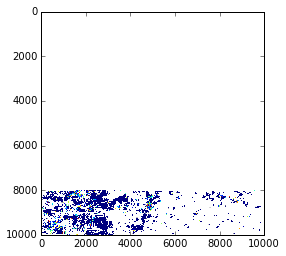

In [45]:
import numpy as np
data = np.zeros((10000,10000))
data[:] = np.nan
for i,j in enumerate(xstd):
    data[indx[i], indy[i]] = j
%matplotlib inline
import pylab as plt
plt.imshow(data)

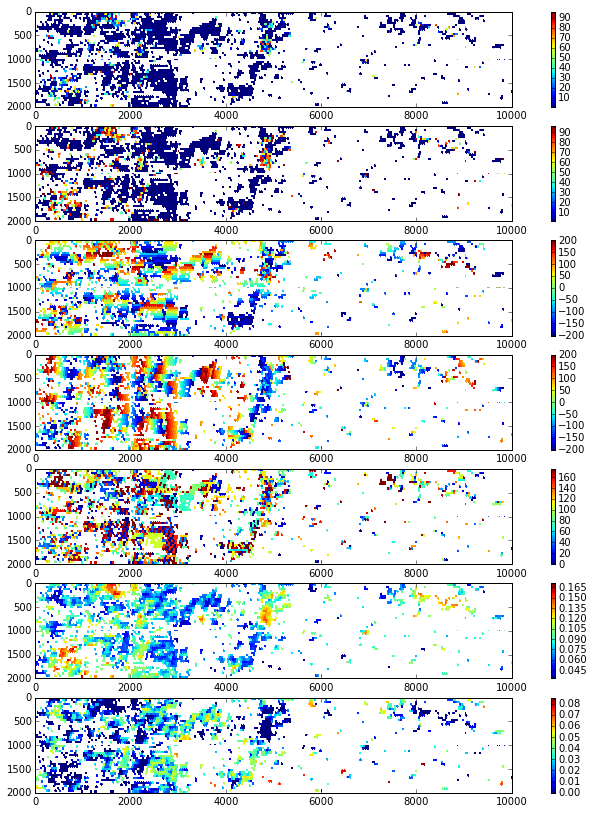

In [46]:
fig = plt.figure(figsize = (14,14))
for k,l in enumerate([xstd, ystd, xsft, ysft, angle,u, conved]):
    data = np.zeros((10000,10000))
    data[:] = np.nan
    for i,j in enumerate(l):
        data[indx[i], indy[i]] = j
    pind = int('71%s'%(k+1))
    ax = fig.add_subplot(pind)
    im = ax.imshow(data[8000:10001,:])
    fig.colorbar(im)

In [47]:
print 'means:',np.mean(xstd),np.mean(ystd),np.mean(angle),np.mean(xsft),np.mean(ysft),np.mean(u),np.mean(conved)
print 'stds:',np.std(xstd),np.std(ystd),np.std(angle),np.std(xsft),np.std(ysft),np.std(u),np.std(conved)

means: 6.45293072824 13.6909413854 91.7118117229 -35.6731793961 -3.37344582593 0.0836797523568 0.0216143594339
stds: 15.5578335865 27.7968628449 56.9825779902 114.954496094 124.148848044 0.0256225341603 0.0183138303236


(0, 0.17076675835067182)

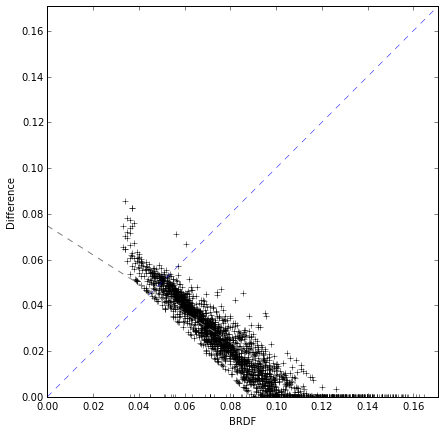

In [61]:
import pylab as plt
import scipy
import scipy.stats
cost = np.array(zip(conved,u))
plt.figure(figsize = (7,7))
maxval = np.nanmax(cost)
r = scipy.stats.linregress(cost[:,1],cost[:,0])

fit = np.polyfit(cost[:,1],cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(cost[:,1],cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlabel('BRDF')
plt.ylabel('Difference')
plt.xlim(0, maxval)
plt.ylim(0, maxval)

In [67]:
data = parallel_rw_pkl(None, '2406test1_pats', r)

In [1]:
import cPickle as pkl
import multiprocessing
from functools import partial
import numpy as np
import glob

cores = multiprocessing.cpu_count()
core_to_use = max(cores-1, 1)


def w_r_pkl(data = None, o = 'none'):

    if o =='w':
        pkl.dump(data.values(), open('%s.pkl'%(data.keys()[0]), 'wb'))
    elif o == 'r':
        return {data.keys()[0]: pkl.load(open('%s'%(data.keys()[0]), 'rb'))}
    else:
        print 'Please specify operation'
        
def chunks(l, n):
    '''split to many chunks'''
    if type(l) is np.ndarray:
        l = list(np.ndarray.tolist(l.ravel()))
    elif type(l) is list or tuple:
        print 'Length of data: %s'%len(l)
    else:
        print 'Date type is %s, but expected data type is ndarray or list or tuple!'%type(l)
    size = len(l)/n
    deci = len(l)-size*n
    inte = l[:size*n]
    data = [inte[i:i+size] for i in range(0,len(inte), size)]
    rest = l[size*n:]
    print 'rest:',rest
    if deci != 0:
        data[-1] = data[-1]+rest
    return data

def parallel_rw_pkl(data, fname, o = 'w'):
    core_to_use = 40
    if o =='w':
        if type(data) is np.ndarray:
            data = list(data.ravel())
        elif type(data) is list or tuple:
            print 'Length of data: %s'%len(data)
        else:
            print 'Date type is %s, but expected data type is ndarray or list or tuple!'%type(data)
        subname = []
        for i in np.arange(core_to_use):
            subname.append('pkls/%s%i'%(fname, i))
        data = chunks(data, core_to_use)  
        dict_data = [{subname[i]: data[i]} for i in xrange(core_to_use)]
        par =  partial(w_r_pkl, o = 'w')
        pool = multiprocessing.Pool(processes = core_to_use)
        pool.map(par, dict_data)
        pool.close()
        pool.join()
    if o == 'r':
        subname = glob.glob('pkls/%s*'%fname)
        dict_data = [{i: []} for i in subname] 
        par =  partial(w_r_pkl, o = 'r')
        pool = multiprocessing.Pool(processes = core_to_use)
        dict_data = pool.map(par, dict_data)
        #data = np.array([dict_data[i]['pkls/%s%i'%(fname, i)] for i in range(16)])
        pool.close()
        pool.join()
        temp = {}
        for i in dict_data:
            temp.update(i)
        data = [temp[i][0] for i in subname]
        a = []
        for i in data:
            if type(i) is np.ndarray:
                a += list(i.ravel())
            elif type(i) is list or tuple:
                a+=i
        return a
    else:
        pass


In [2]:
import numpy as np
c = np.arange(100000)

In [3]:
def chunks(l, n):
    '''split to many chunks'''
    if type(l) is np.ndarray:
        l = list(np.ndarray.tolist(l.ravel()))
    elif type(l) is list or tuple:
        print 'Length of data: %s'%len(l)
    else:
        print 'Date type is %s, but expected data type is ndarray or list or tuple!'%type(l)
    size = len(l)/n
    deci = len(l)-size*n
    inte = l[:size*n]
    data = [inte[i:i+size] for i in range(0,len(inte), size)]
    rest = l[size*n:]
    print rest
    if deci != 0:
        data[-1] = data[-1]+rest
    return data

In [ ]:
from scipy import signal
import numpy as np
import scipy
from scipy import signal
from scipy.ndimage.morphology import binary_dilation as bd
import scipy.ndimage as ndimage

from functools import partial
import multiprocessing
import sys
sys.path.insert(0,'python')
from parallel import *
import numpy.ma as ma
from collections import Counter


def gaussian(xwin, ywin, xstd, ystd, angle, norm = False):
    win = max(xwin, ywin)
    if win <=0:
        print 'Window size can not be 0 or less, xwin: %s ywin: %s'%(xwin, ywin)
        pass
    else:
        winx = win*2**0.5
        winy = win*2**0.5
        xgaus = signal.gaussian(winx, xstd)
        ygaus = signal.gaussian(winy, ystd)
        gaus  = np.outer(xgaus, ygaus)
        r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
        center = np.array(r_gaus.shape)/2
        cgaus = r_gaus[center[0]-xwin/2.: center[0]+xwin/2., center[1]-ywin/2.:center[1]+ywin/2.]
        if norm:
            return cgaus/cgaus.sum()
        else:
            return cgaus
#Gaussian one
def shift(pat, mode='gaus'): 
    mask,to_conv, brdf, indx, indy = pat
    
    if (mask.sum() >= 2000) and (mask.sum() < 3000):
        
        if mode == 'mean':
            w = 1./(np.nansum(mask))
            k = np.zeros(mask.shape).astype('float')
            k[mask] = w
            conved = signal.fftconvolve(to_conv, k, mode='valid')
            dif = abs(conved-brdf)
            minm = np.nanmin(dif)
            x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
            y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
            vals = conved[np.where(dif == minm)[0][0], np.where(dif == minm)[1][0]]
            return [x, y , brdf, vals, indx,indy]

        elif mode == 'gaus':
            
            xwin, ywin = mask.shape           
            
            if (xwin <= 0) or (ywin<=0):
                pass
            else:
                cost = []
                start = 1.
                star = 0
                end = 60
                if star == 0:
                    star +=0.0001
                if end == 0:
                    end +=0.0002
                for xstd in np.arange(star,end,1):
                    for ystd in np.arange(star,end,1):
                        if xstd <=ystd:
                            for angle in xrange(30,160, 2):
                                gaus = gaussian(xwin,ywin,xstd,ystd,angle, False)                            
                                gaus[~mask]=0
                                if gaus.sum() <= 0:
                                    return 0
                                else:
                                    ker = gaus/(gaus.sum())
                                    conved = signal.fftconvolve(to_conv, ker, mode='valid')
                                    dif = abs(conved-brdf)
                                    minm = np.nanmin(dif)
                                    if minm<start:
                                        x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
                                        y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
                                        vals = conved[np.where(dif == minm)[0][0], np.where(dif == minm)[1][0]]
                                        cost.append([xstd, ystd, angle, x, y , brdf, vals, indx, indy])
                                        start = minm
                                        print 'Find One!!', start
                        else:
                            pass
                return cost[-1]
            
        else:
            pass

    
    else:
        pass

data = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')
stm = parallel_rw_pkl(None, 'std_m', 'r')
data = np.array(data).reshape(10980,10980)
mask = np.array(mask).reshape(10980,10980)
stm = np.array(stm).reshape(10980,10980)

grid_z0 = ma.array(data, mask=mask)
b4 = parallel_rw_pkl(None, 'band4', 'r')
b4 = np.array(b4).reshape(10980,10980)
print 'finished reading data'
inds = np.array_split(np.unique(stm),5)
ite = inds[0]

Sent = b4
modis_sent = grid_z0
struct = ndimage.generate_binary_structure(2, 2)

def get_pixels(i):
    mask = (stm==i)
    brdf = Counter(modis_sent[mask]).most_common(1)[0][0]
    xmin = np.where(mask)[0].min()
    xmax = np.where(mask)[0].max()
    ymin = np.where(mask)[1].min()
    ymax = np.where(mask)[1].max()
    indx = np.where(mask)[0]
    indy = np.where(mask)[1]
    dia_mask = bd(mask, structure=struct, iterations=200)
    Sent[~dia_mask] = 0
    to_conv = Sent[min(np.where(dia_mask)[0]):max(np.where(dia_mask)[0])+1,
                   min(np.where(dia_mask)[1]):max(np.where(dia_mask)[1])+1]
    mask = mask[xmin:xmax+1, ymin:ymax+1]
    
    return np.array([mask,np.array(to_conv), np.array(brdf), indx, indy], dtype = object)

randind = np.random.choice(np.unique(stm),10000)

for i,j in enumerate(np.array_split(randind, 20)): 
    patches = (get_pixels(k) for k in j)
    par = partial(shift, mode='mean')
    pool = multiprocessing.Pool(processes=45)
    data = pool.map(par, patches)
    pool.close()
    pool.join()
    parallel_rw_pkl(data, '2706testmean_%i'%i, 'w')


In [22]:
def shift(pat, mode='gaus'): 
    mask,to_conv, brdf, indx, indy = pat
    
    if (mask.sum() >= 2000) and (mask.sum() < 3000):
        
        if mode == 'mean':
            w = 1./(np.nansum(mask))
            k = np.zeros(mask.shape).astype('float')
            k[mask] = w
            print w
            conved = signal.fftconvolve(to_conv, k, mode='valid')
            dif = abs(conved-brdf)
            minm = np.nanmin(dif)
            x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
            y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
            vals = conved[np.where(dif == minm)[0][0], np.where(dif == minm)[1][0]]
            return [x, y , brdf, vals, indx,indy]

        elif mode == 'gaus':
            
            xwin, ywin = mask.shape           
            
            if (xwin <= 0) or (ywin<=0):
                pass
            else:
                cost = []
                start = 1.
                star = 0
                end = 60
                if star == 0:
                    star +=0.0001
                if end == 0:
                    end +=0.0002
                for xstd in np.arange(star,end,1):
                    for ystd in np.arange(star,end,1):
                        if xstd <=ystd:
                            for angle in xrange(30,160, 2):
                                gaus = gaussian(xwin,ywin,xstd,ystd,angle, False)                            
                                gaus[~mask]=0
                                if gaus.sum() <= 0:
                                    return 0
                                else:
                                    ker = gaus/(gaus.sum())
                                    conved = signal.fftconvolve(to_conv, ker, mode='valid')
                                    dif = abs(conved-brdf)
                                    minm = np.nanmin(dif)
                                    if minm<start:
                                        x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
                                        y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
                                        vals = conved[np.where(dif == minm)[0][0], np.where(dif == minm)[1][0]]
                                        cost.append([xstd, ystd, angle, x, y , brdf, vals, indx, indy])
                                        start = minm
                                        print 'Find One!!', start
                        else:
                            pass
                return cost[-1]
            
        else:
            pass

    
    else:
        pass

In [23]:
import sys
sys.path.insert(0,'python')
from parallel_rw import *

def get_pixels(i):
    mask = (stm==i)
    brdf = Counter(modis_sent[mask]).most_common(1)[0][0]*0.001
    xmin = np.where(mask)[0].min()
    xmax = np.where(mask)[0].max()
    ymin = np.where(mask)[1].min()
    ymax = np.where(mask)[1].max()
    indx = np.where(mask)[0]
    indy = np.where(mask)[1]
    dia_mask = bd(mask, structure=struct, iterations=200)
    Sent[~dia_mask] = 0
    to_conv = Sent[min(np.where(dia_mask)[0]):max(np.where(dia_mask)[0])+1,
                   min(np.where(dia_mask)[1]):max(np.where(dia_mask)[1])+1]
    mask = mask[xmin:xmax+1, ymin:ymax+1]
    
    return np.array([mask,np.array(to_conv), np.array(brdf), indx, indy], dtype = object)

randind = np.random.choice(np.unique(stm),100)

for i,j in enumerate(np.array_split(randind,25)): 
    patches = (get_pixels(k) for k in j)
    par = partial(shift, mode='mean')
    pool = multiprocessing.Pool(processes=4)
    data = pool.map(par, patches)
    pool.close()
    pool.join()
    break
    #parallel_rw_pkl(data, '2706testmean_%i'%i, 'w')

0.000463606861382
0.000471475719
0.000464468183929


In [31]:
def shift(pat, mode='gaus'): 
    mask,to_conv, brdf, indx, indy = pat
    
    if (mask.sum() >= 2000) and (mask.sum() < 3000):
        
        if mode == 'mean':
            w = 1./(np.nansum(mask))
            k = np.zeros(mask.shape).astype('float')
            k[mask] = w
            print k.shape, to_conv.shape
            conved = signal.fftconvolve(to_conv, k, mode='valid')
            dif = abs(conved-brdf)
            minm = np.nanmin(dif)
            x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
            y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
            vals = conved[np.where(dif == minm)[0][0], np.where(dif == minm)[1][0]]
            return [x, y , brdf, vals, indx,indy, conved, dif]
        
def get_pixels(i, Sent, stm, modis_sent):
    mask = (stm==i)
    brdf = Counter(modis_sent[mask]).most_common(1)[0][0]
    xmin = np.where(mask)[0].min()
    xmax = np.where(mask)[0].max()
    ymin = np.where(mask)[1].min()
    ymax = np.where(mask)[1].max()
    indx = np.where(mask)[0]
    indy = np.where(mask)[1]
    dia_mask = bd(mask, structure=struct, iterations=200)
    Sent[~dia_mask] = 0
    to_conv = Sent[min(np.where(dia_mask)[0]):max(np.where(dia_mask)[0])+1,
                   min(np.where(dia_mask)[1]):max(np.where(dia_mask)[1])+1]
    mask = mask[xmin:xmax+1, ymin:ymax+1]
    
    return np.array([mask,np.array(to_conv), np.array(brdf), indx, indy], dtype = object)


In [71]:
randind = np.random.choice(np.unique(stm),100)
Sent = b4; modis_sent = modis_sent; stm = stm
patches = get_pixels(randind[0])
a = shift(patches, mode='mean')

(55, 46) (455, 446)


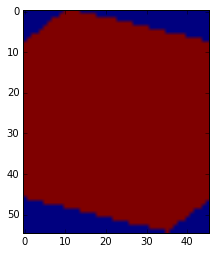

In [73]:
plt.imshow(patches[0])

In [ ]:
def get_pixels(i, Sent, stm, modis_sent):
    mask = (stm==i)
    brdf = Counter(modis_sent[mask]).most_common(1)[0][0]
    xmin = np.where(mask)[0].min()
    xmax = np.where(mask)[0].max()
    ymin = np.where(mask)[1].min()
    ymax = np.where(mask)[1].max()
    indx = np.where(mask)[0]
    indy = np.where(mask)[1]
    dia_mask = bd(mask, structure=struct, iterations=200)
    Sent[~dia_mask] = 0
    to_conv = Sent[min(np.where(dia_mask)[0]):max(np.where(dia_mask)[0])+1,
                   min(np.where(dia_mask)[1]):max(np.where(dia_mask)[1])+1]
    mask = mask[xmin:xmax+1, ymin:ymax+1]
    
    return np.array([mask,np.array(to_conv), np.array(brdf), indx, indy], dtype = object)

In [119]:
randind = np.random.choice(np.unique(stm),100)
b4c = b4.copy()
mask = (stm==randind[0])
brdf = Counter(modis_sent[mask]).most_common(1)[0][0]
xmin = np.where(mask)[0].min()
xmax = np.where(mask)[0].max()
ymin = np.where(mask)[1].min()
ymax = np.where(mask)[1].max()
indx = np.where(mask)[0]
indy = np.where(mask)[1]
dia_mask = bd(mask, structure=struct, iterations=200)

b4c[~dia_mask] = 0
cxmin = np.where(dia_mask)[0].min()
cxmax = np.where(dia_mask)[0].max()
cymin = np.where(dia_mask)[1].min()
cymax = np.where(dia_mask)[1].max()

to_conv = b4c[cxmin:cxmax+1, cymin:cymax+1]
mask = mask[xmin:xmax+1, ymin:ymax+1]

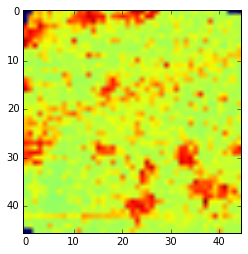

In [121]:
plt.imshow(to_conv[::10,::10])

In [123]:
a = shift([mask, to_conv,brdf,indx,indy], mode='mean')

(55, 47) (455, 447)


[342] [42]


(400, 0)

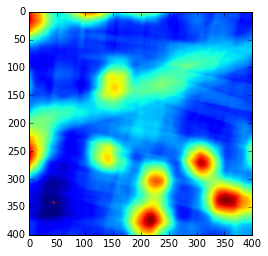

In [138]:
plt.imshow(a[-1])
minm = a[-1].min()
x,y = np.where(a[-1]==minm)
print x,y
plt.plot(y,x, 'r+')
plt.xlim(0,400)
plt.ylim(400,0)

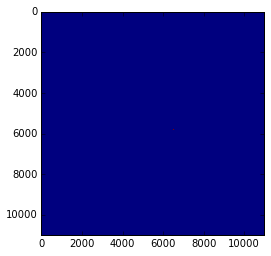

In [141]:
plt.imshow((stm==randind[0]))

In [4]:
import pylab as plt
%matplotlib inline
import sys
sys.path.insert(0,'python')
from fast_rw import *

stm = parallel_rw_pkl(None, 'std_m', 'r')

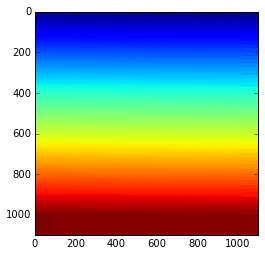

In [57]:
#stm = np.array(stm).reshape(10980,10980)
plt.imshow(stm[::10,::10])

In [5]:
b4 = parallel_rw_pkl(None, 'band4', 'r')
b4 = np.array(b4).reshape(10980,10980)

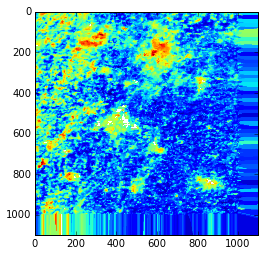

In [67]:
plt.imshow(modis_sent[::10,::10])